In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

Object boston is a dictionary, so we will explore the keys of this dictionary.

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
# print the shape of the DataFrame
boston.data.shape

(506, 13)

We will print the feature names of boston data set.

In [6]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
## We will  check the description of this data set to get more information about it. to predict the  housing prices in boston region using the features given.

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Since the column names are just numbers, we will replace those numbers with the feature names.

bos.columns = boston.feature_names

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston.target[:5]     # housing prices

array([24. , 21.6, 34.7, 33.4, 36.2])

In [12]:
## add these target prices to the bos data frame.

bos['PRICE'] = boston.target

In [13]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
## to  fit a linear regression model and predict the Boston housing prices.

In [15]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis =1)               #This will drop the 'PRICE' col since we only want parameters.

y = bos.PRICE

# follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# print intercept and coefficients
print(lm.intercept_)
print(len(lm.coef_), lm.coef_)

36.491103280364015
13 [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


In [27]:
##a dataframe that contains features and estimated coefficients.

new = pd.DataFrame(list(zip(X.columns, lm.coef_)),columns = ['features', 'estimatedCoefficient'])

In [28]:
new

,features,estimatedCoefficient
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


From the data frame, we see that there is a high correlation between RM and prices. We will plot a scatter plot between real housing prices and real RM.

Text(0,0.5,'Relationship between RM and Price')

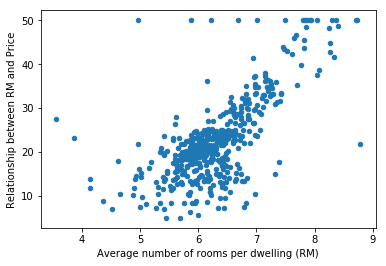

In [29]:
bos.plot(kind='scatter', x='RM', y='PRICE')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Relationship between RM and Price')

We can see there is a positive correlation between RM and housing prices.

In [30]:
#Predicting Prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Text(0.5,1,'Prices vs Predicted Prices')

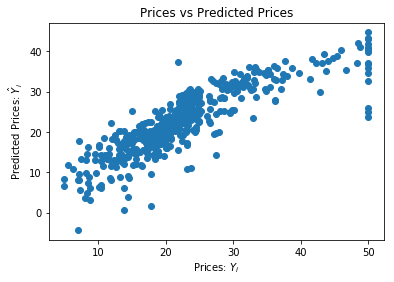

In [31]:
#plot a scatter plot to compare true prices and the predicted prices.
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices')

In [32]:
## calculate the mean squared error.
mse = np.mean((bos.PRICE - lm.predict(X))** 2)
print(mse)

21.897779217687493


If we fit linear regression for  one feature the error will be very high. Let's take the feature ‘PTRATIO’ and calculate the mean squared error.

In [33]:
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
mse2 = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376927


The mean squared error has increased. Hence, we can say that a single feature is not a good predictor of housing prices.